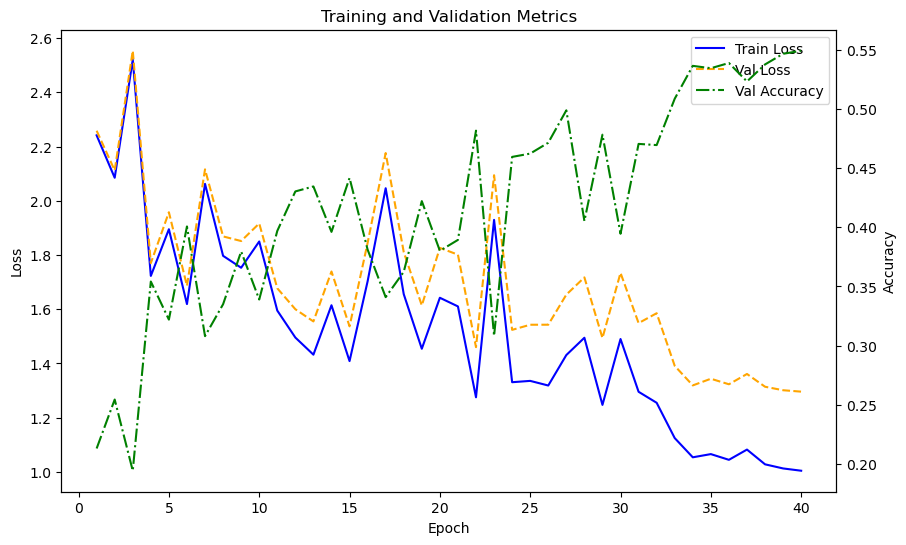

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
epochs = np.arange(1, 41)
train_loss = [2.2413, 2.0848, 2.5207, 1.7227, 1.8949, 1.6188, 2.0623, 1.7968, 1.7528, 1.8497,
              1.5949, 1.4954, 1.4322, 1.6145, 1.4085, 1.7027, 2.0462, 1.6554, 1.4540, 1.6421,
              1.6102, 1.2750, 1.9294, 1.3306, 1.3355, 1.3184, 1.4308, 1.4946, 1.2469, 1.4899,
              1.2953, 1.2547, 1.1245, 1.0536, 1.0654, 1.0443, 1.0821, 1.0277, 1.0125, 1.0041]
val_loss = [2.2583, 2.1119, 2.5534, 1.7699, 1.9576, 1.6861, 2.1159, 1.8684, 1.8514, 1.9162,
            1.6771, 1.5998, 1.5548, 1.7390, 1.5367, 1.8444, 2.1760, 1.8107, 1.6137, 1.8261,
            1.8011, 1.4599, 2.0941, 1.5237, 1.5426, 1.5427, 1.6536, 1.7172, 1.4936, 1.7339,
            1.5486, 1.5851, 1.3909, 1.3188, 1.3434, 1.3230, 1.3610, 1.3139, 1.3010, 1.2958]
val_accuracy = [0.2130, 0.2544, 0.1942, 0.3542, 0.3220, 0.4008, 0.3080, 0.3350, 0.3796, 0.3390,
                0.3970, 0.4304, 0.4346, 0.3962, 0.4418, 0.3812, 0.3410, 0.3624, 0.4222, 0.3802,
                0.3894, 0.4818, 0.3082, 0.4596, 0.4624, 0.4716, 0.4990, 0.4054, 0.4784, 0.3946,
                0.4706, 0.4696, 0.5088, 0.5366, 0.5346, 0.5390, 0.5234, 0.5378, 0.5468, 0.5494]

# 创建画布和子图
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制训练集loss曲线
ax1.plot(epochs, train_loss, label='Train Loss', color='blue', linestyle='-')
# 绘制验证集loss曲线
ax1.plot(epochs, val_loss, label='Val Loss', color='orange', linestyle='--')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建第二个y轴用于验证集accuracy
ax2 = ax1.twinx()
# 绘制验证集accuracy曲线
ax2.plot(epochs, val_accuracy, label='Val Accuracy', color='green', linestyle='-.')
ax2.set_ylabel('Accuracy', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# 设置图标题
plt.title('Training and Validation Metrics')
# 显示图形
plt.show()

参数类型: <class 'dict'>
参数键名: dict_keys(['weights', 'biases'])

权重形状验证:
第1层权重形状: (3072, 512)
第2层权重形状: (512, 10)

偏置形状验证:
第1层偏置形状: (1, 512)
第2层偏置形状: (1, 10)


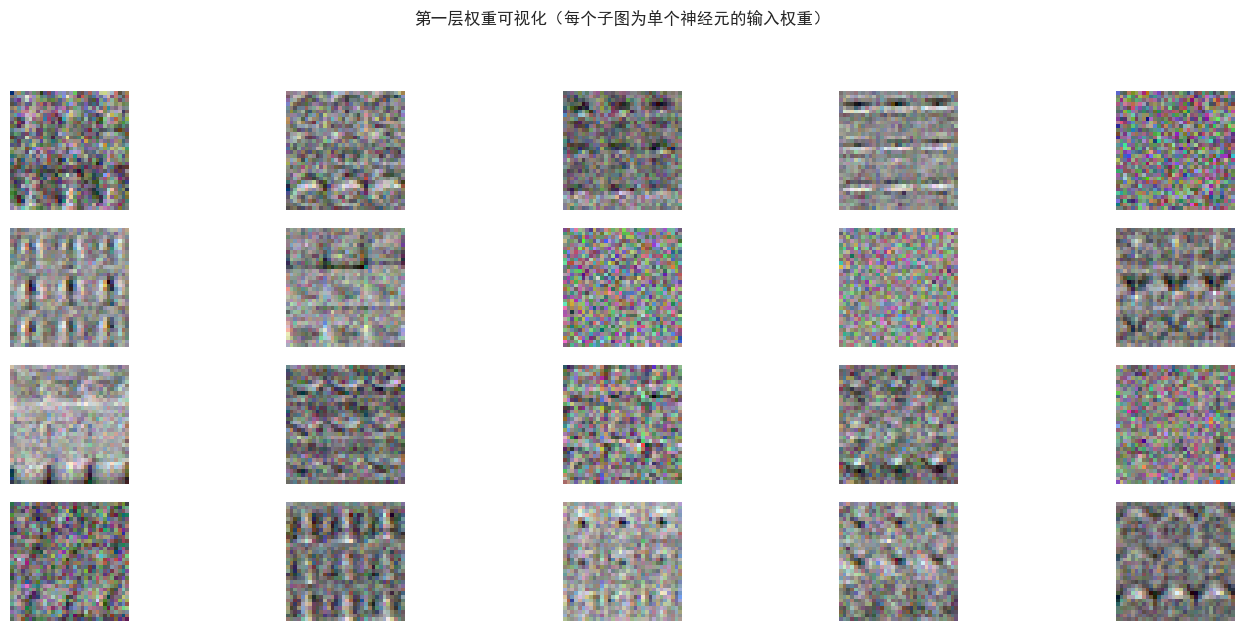

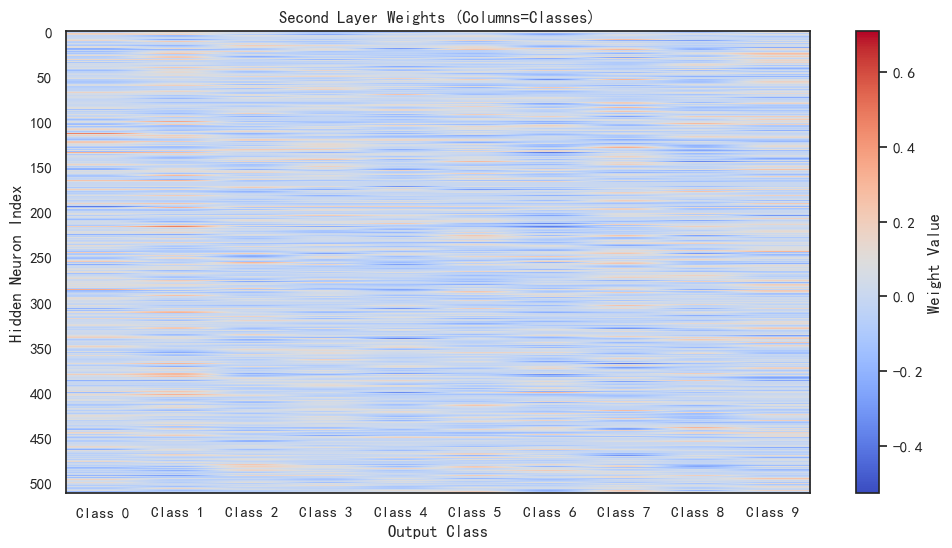

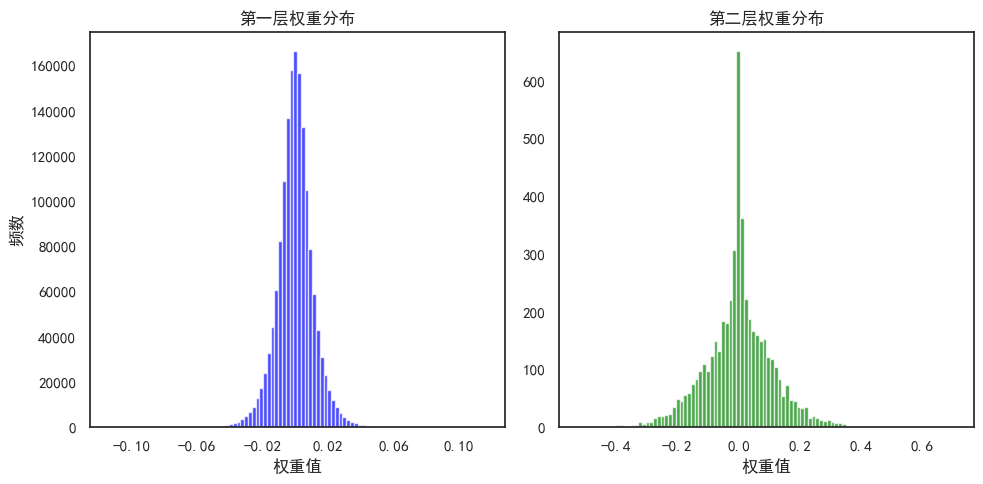

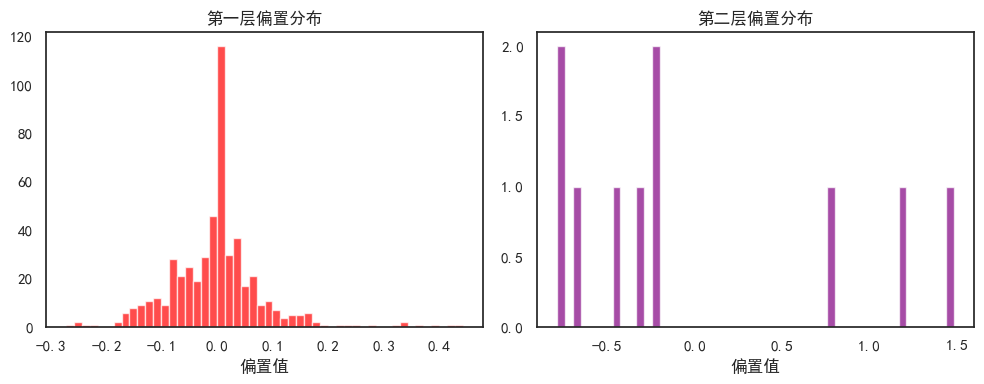

In [24]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False 
# --------------------------------------------
# 步骤 1：加载参数文件并检查数据结构
# --------------------------------------------
with open("best_model_test_accuracy.pkl", "rb") as f:
    params = pickle.load(f)

# 确认参数类型和键名
print("参数类型:", type(params))                    # 应输出 <class 'dict'>
print("参数键名:", params.keys())                   # 应输出 dict_keys(['weights', 'biases'])

# --------------------------------------------
# 步骤 2：提取权重和偏置（适配你的字典结构）
# --------------------------------------------
# 提取权重列表和偏置列表
weights = params["weights"]  # 类型为 list，包含两个权重矩阵 [w1, w2]
biases = params["biases"]    # 类型为 list，包含两个偏置向量 [b1, b2]

# 检查形状是否与之前描述一致
print("\n权重形状验证:")
print("第1层权重形状:", weights[0].shape)  # 应输出 (3072, 512)
print("第2层权重形状:", weights[1].shape)  # 应输出 (512, 10)

print("\n偏置形状验证:")
print("第1层偏置形状:", biases[0].shape)   # 应输出 (1, 512)
print("第2层偏置形状:", biases[1].shape)   # 应输出 (1, 10)

# --------------------------------------------
# 步骤 3：处理偏置的维度（去除多余维度）
# --------------------------------------------
# 将偏置从 (1, 512) 压缩为 (512,)
bias_fc1 = biases[0].squeeze()
bias_fc2 = biases[1].squeeze()

# --------------------------------------------
# 步骤 4：可视化第一层权重（输入层 → 隐藏层）
# --------------------------------------------
# 提取第一个权重矩阵 (3072, 512)
w_fc1 = weights[0]

plt.figure(figsize=(15, 6))
plt.suptitle("第一层权重可视化（每个子图为单个神经元的输入权重）", y=1.05, fontproperties="SimHei")  # 中文需要指定字体

# 可视化前20个神经元的权重（每列对应一个神经元）
for i in range(20):
    plt.subplot(4, 5, i + 1)
    
    # 提取第i个神经元的权重并重塑为 32x32x3
    neuron_weights = w_fc1[:, i].reshape(32, 32, 3)
    
    # 归一化到 [0, 1] 范围
    neuron_weights_normalized = (neuron_weights - np.min(neuron_weights)) / (
        np.max(neuron_weights) - np.min(neuron_weights) + 1e-8  # 防止除零
    )
    
    plt.imshow(neuron_weights_normalized)
    plt.axis("off")

plt.tight_layout()
plt.show()

# --------------------------------------------
# 步骤 5：可视化第二层权重（隐藏层 → 输出层）
# --------------------------------------------
# 提取第二个权重矩阵 (512, 10)
w_fc2 = weights[1]

plt.figure(figsize=(12, 6))
plt.imshow(w_fc2, cmap="coolwarm", aspect="auto")

# 设置纵坐标刻度（每隔50个神经元显示一个标签）
plt.yticks(
    ticks=np.arange(0, 512, 50),          # 刻度位置：0, 50, 100, ..., 500
    labels=np.arange(0, 512, 50)          # 标签内容
)

# 设置横坐标
plt.xticks(range(10), [f"Class {i}" for i in range(10)])

plt.colorbar(label="Weight Value")
plt.xlabel("Output Class")
plt.ylabel("Hidden Neuron Index")
plt.title("Second Layer Weights (Columns=Classes)")
plt.show()

# --------------------------------------------
# 步骤 6：绘制权重分布直方图
# --------------------------------------------
# 第一层权重分布直方图
plt.figure(figsize=(10, 5))

# 第一层权重分布
plt.subplot(1, 2, 1)
plt.hist(w_fc1.flatten(), bins=100, color="blue", alpha=0.7)

# 手动设置纵轴刻度（间隔10,000）
plt.yticks(ticks=np.arange(0, 160001, 20000), labels=np.arange(0, 160001, 20000))

# 手动设置横轴刻度（间隔0.02）
plt.xticks(ticks=np.arange(-0.10, 0.11, 0.04))
plt.title("第一层权重分布")
plt.xlabel("权重值")
plt.ylabel("频数")

# 第二层权重分布
plt.subplot(1, 2, 2)
plt.hist(w_fc2.flatten(), bins=100, color="green", alpha=0.7)

# 手动设置纵轴刻度（间隔50）
plt.yticks(ticks=np.arange(0, 601, 100), labels=np.arange(0, 601, 100))

# 手动设置横轴刻度（间隔0.1）
plt.xticks(ticks=np.arange(-0.4, 0.7, 0.2))
plt.title("第二层权重分布")
plt.xlabel("权重值")

plt.tight_layout()
plt.show()

# --------------------------------------------
# 步骤 7：绘制偏置分布
# --------------------------------------------
# 偏置分布直方图
plt.figure(figsize=(10, 4))

# 第一层偏置分布
plt.subplot(1, 2, 1)
plt.hist(bias_fc1, bins=50, color="red", alpha=0.7)

# 手动设置纵轴刻度（间隔20）
plt.yticks(ticks=np.arange(0, 121, 20), labels=np.arange(0, 121, 20))

# 手动设置横轴刻度（间隔0.1）
plt.xticks(ticks=np.arange(-0.3, 0.5, 0.1))
plt.title("第一层偏置分布")
plt.xlabel("偏置值")

# 第二层偏置分布
plt.subplot(1, 2, 2)
plt.hist(bias_fc2, bins=50, color="purple", alpha=0.7)

# 手动设置纵轴刻度（间隔0.5）
plt.yticks(ticks=np.arange(0, 2.01, 0.5), labels=np.arange(0, 2.01, 0.5))

# 手动设置横轴刻度（间隔0.5）
plt.xticks(ticks=np.arange(-0.5, 1.6, 0.5))
plt.title("第二层偏置分布")
plt.xlabel("偏置值")

plt.tight_layout()
plt.show()